In [1]:
import cv2,os
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import  Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import load_model

In [2]:
#https://github.com/Ghosh-Anisha/Face-mask-dataset - link to dataset
data_path = '\experiements\data'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories,labels))
print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [3]:
img_size = 150
data = []
target = []
for category in categories:
    folder_path = os.path.join(data_path,category) 
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        img = cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
        
        except Exception as e:
            print("Exception: ",e)

In [4]:
data = np.array(data)/255.0  #data values are normalized
#reshaping of data                                                
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)
new_target = np_utils.to_categorical(target)
#saving the files                                
np.save('data',data)
np.save('target',new_target)

In [5]:
data = np.load('data.npy')
target = np.load('target.npy')
model = Sequential()
model.add(Conv2D(200,(4,4),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(100,(4,4)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 147, 147, 200)     3400      
_________________________________________________________________
activation (Activation)      (None, 147, 147, 200)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 100)       320100    
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 22500)             0

In [6]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2)

In [7]:
checkpoint=ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose = 0, save_best_only = True,mode='auto')
history = model.fit(train_data,train_target,epochs = 20, callbacks = [checkpoint], validation_split = 0.2)

Epoch 1/20
34/34 [==============================] - ETA: 0s - loss: 0.6919 - acc: 0.5754WARNING:tensorflow:From C:\Users\anish\anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
34/34 [==============================] - 63s 2s/step - loss: 0.6919 - acc: 0.5754 - val_loss: 0.6528 - val_acc: 0.5993
Epoch 2/20
34/34 [==============================] - 58s 2s/step - loss: 0.5848 - acc: 0.6801 - val_loss: 0.4816 - val_acc: 0.7757
Epoch 3/20
34/34 [==============================] - 58s 2s/step - loss: 0.3932 - acc: 0.8208 - val_loss: 0.3112 - val_acc: 0.8676

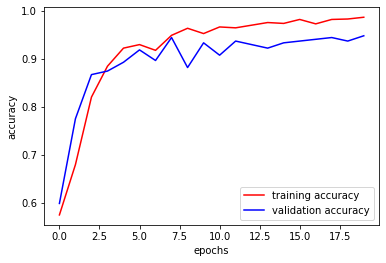

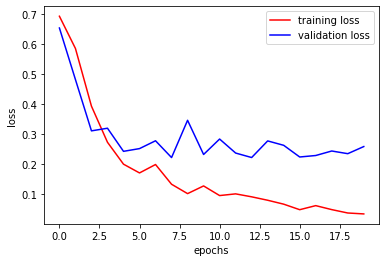

In [8]:
plt.plot(history.history['acc'],'r',label='training accuracy')
plt.plot(history.history['val_acc'],'b',label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print(model.evaluate(test_data,test_target))

11/11 [==============================] - 4s 381ms/step - loss: 0.2137 - acc: 0.9294
[0.2137349247932434, 0.929411768913269]


In [14]:
img_test='/Downloads/test1.jpg'
img1 = cv2.imread(img_test)
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray1,(img_size,img_size))
data1 = np.array(resize)/255.0  #data values are normalized
#reshaping of data                                                
data1 = np.reshape(data1,(1,150,150,1))

yhat = model.predict(data1, verbose=0)
label = np.argmax(yhat,axis=1)[0]
if (label):
    print("mask is present")
else:
    print("no mask")

mask is present


In [10]:
from keras.models import Model

In [11]:
model.save("model_new.h5")